In [18]:
!pip install vaex

In [13]:
import numpy as np
import pandas as pd
from scipy.stats import rv_discrete
import statsmodels
import vaex
import rawpy
import h5py

import dask
import dask.dataframe as dd

import os
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
path_raw = './raw_noise/'

rgb = np.memmap('rgb.memmap', dtype='uint8', mode='w+', shape=(1250,4498,6742,3))

files = os.listdir(path_raw)

i=0
for filename in (pbar := tqdm(files)):
    pbar.set_description(f"Processing {filename}")
    filename = os.path.join(path_raw, filename)
    raw = rawpy.imread(filename)
    rgb_read = raw.postprocess(use_camera_wb=True, output_color=rawpy.ColorSpace.sRGB)
    rgb[i] = rgb_read
    i+=1
rgb = np.reshape(rgb,(1250*4498*6742,3))
rgb.flush()

Processing iso_640__0250.CR3: 100%|██████████████████████████████████████████████| 1250/1250 [1:26:17<00:00,  4.14s/it]


In [3]:
rgb.shape

(37906895000, 3)

In [2]:
rgb = np.memmap('rgb.memmap', dtype='uint8', mode='r', shape=(37906895000, 3))

In [4]:
rgb_h5f = h5py.File('rgb.h5', 'w')
rgb_h5f.create_dataset('red', data=rgb[:,0])
rgb_h5f.create_dataset('green', data=rgb[:,1])
rgb_h5f.create_dataset('blue', data=rgb[:,2])
rgb_h5f.close()

In [5]:
vdf_rgb = vaex.open("rgb.h5")
vdf_rgb.info()

In [6]:
vdf_rgb.describe()

,blue,green,red
data_type,uint8,uint8,uint8
count,37906895000,37906895000,37906895000
NA,0,0,0
mean,60.413173112833434,27.636119099388118,62.96809047665339
std,54.53738,38.217698,60.149379
min,0,0,0
max,255,255,255


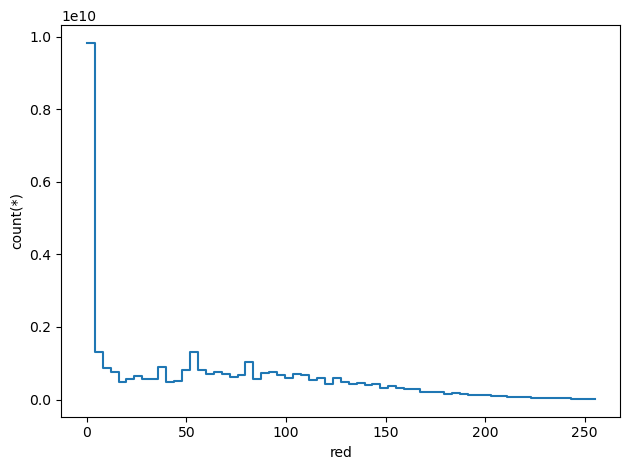

In [12]:
vdf_rgb.viz.histogram(vdf_rgb['red'])

In [ ]:
plt.subplots(1,3, figsize=(15,10))
plt.subplot(1,3,1)
vdf_rgb.viz.histogram(vdf_rgb['red'])
plt.title('red')
plt.subplot(1,3,2)
vdf_rgb.viz.histogram(vdf_rgb['green'])
plt.title('green')
plt.subplot(1,3,3)
vdf_rgb.viz.histogram(vdf_rgb['blue'])
plt.title('blue')
plt.show()

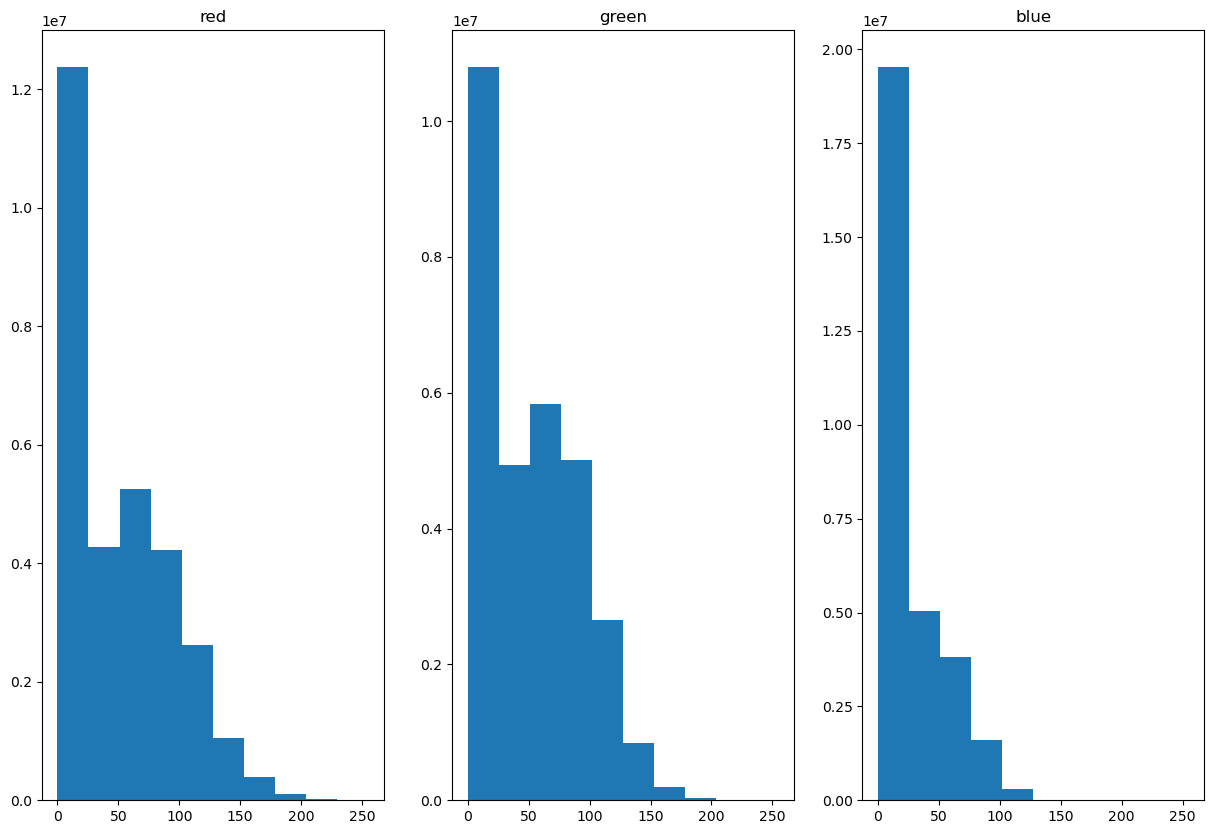

In [9]:
plt.subplots(1,3, figsize=(15,10))
plt.subplot(1,3,1)
plt.hist(vdf_rgb['red'])
plt.title('red')
plt.subplot(1,3,2)
plt.hist(vdf_rgb['red'])
plt.title('green')
plt.subplot(1,3,3)
plt.hist(vdf_rgb['red'])
plt.title('blue')
plt.show()

In [23]:
vec_counts_r = np.unique(rgb_r.flatten(), return_counts=True)
vec_counts_g = np.unique(rgb_g.flatten(), return_counts=True)
vec_counts_b = np.unique(rgb_b.flatten(), return_counts=True)
length = len(rgb_r.flatten())

In [24]:
vec_x_r = vec_counts_r[0]
vec_p_r = vec_counts_r[1].astype('float32')/length

vec_x_g = vec_counts_g[0]
vec_p_g = vec_counts_g[1].astype('float32')/length

vec_x_b = vec_counts_b[0]
vec_p_b = vec_counts_b[1].astype('float32')/length

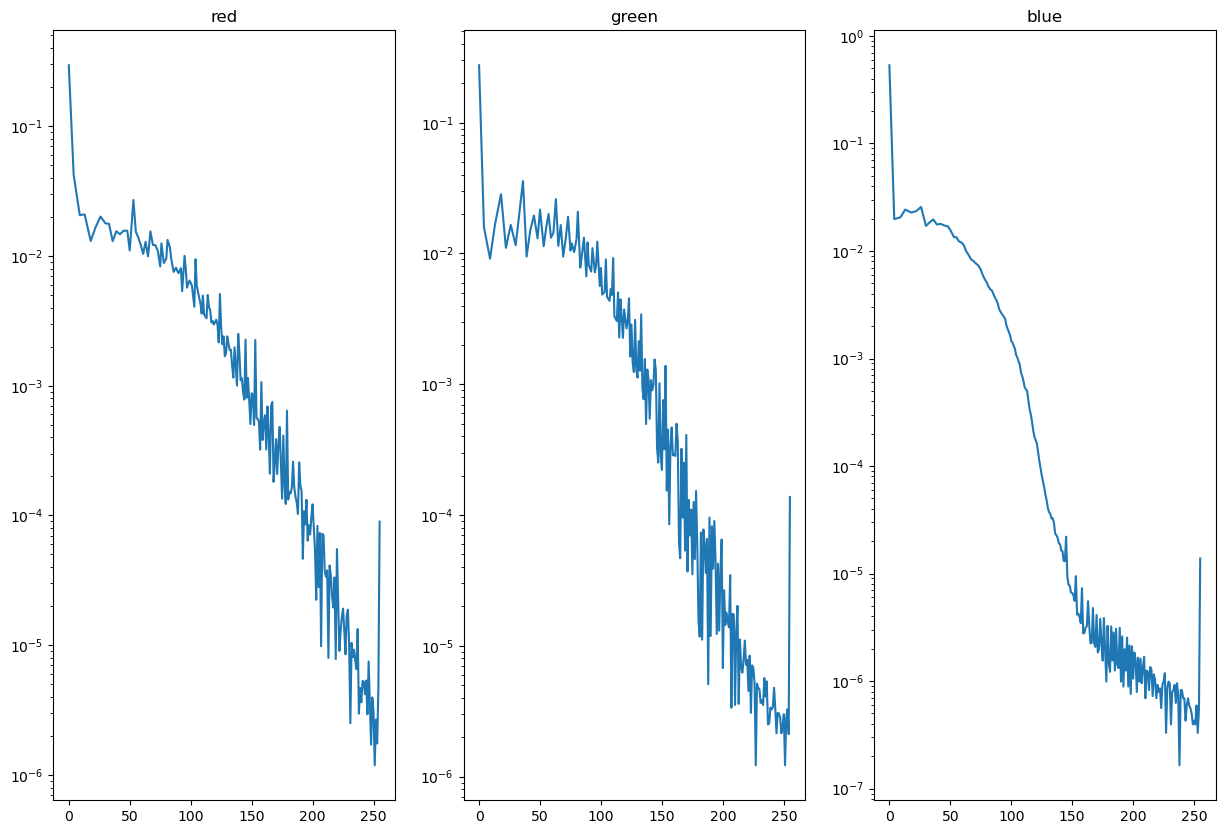

In [25]:
plt.subplots(1,3, figsize=(15,10))
plt.subplot(1,3,1)
plt.plot(vec_x_r, vec_p_r)
plt.yscale('log')
plt.title('red')
plt.subplot(1,3,2)
plt.plot(vec_x_g, vec_p_g)
plt.yscale('log')
plt.title('green')
plt.subplot(1,3,3)
plt.plot(vec_x_b, vec_p_b)
plt.yscale('log')
plt.title('blue')
plt.show()

In [30]:
sum(vec_p_r)

0.9999999999999994